In [1]:
import datetime
import pyaurorax
import numpy as np
import cartopy.crs

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

# Plotting Instrument FOVs on a map

Using our tools, it is straightforward to make maps of an instrument's field-of-view, at specific sites, across all sites, or even for custom locations. Below are several examples of doing so.

## Plotting FoV for an instrument by site

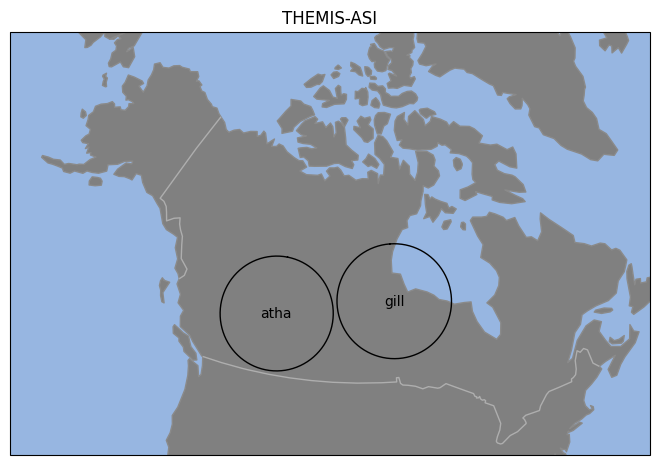

In [2]:
# Create the FOVData object, for two THEMIS cameras
fov_data = at.fov.create_data(sites=['atha', 'gill'], instrument_array='themis_asi')

# Create map projection
center_lat = -100.0
center_lon = 55.0
projection_obj = cartopy.crs.NearsidePerspective(central_longitude=center_lat, central_latitude=center_lon)

# Create the map object
fov_map = at.fov.create_map(projection_obj, fov_data)

# Plot the map with FoVs
map_extent = [-145, -65, 35, 80]
fov_map.plot(map_extent, title='THEMIS-ASI')

## Adding a custom site

Let's say you wanted to see, hypothetically, the field-of-view of a THEMIS imager if it was placed elsewhere (not at a real THEMIS site)

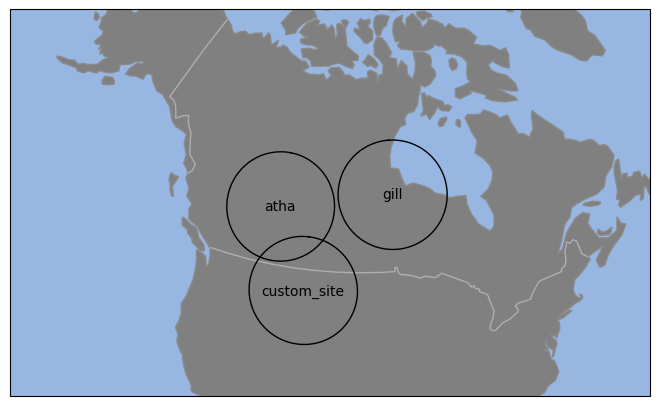

In [3]:
fov_data = at.fov.create_data(sites=['atha', 'gill', ('custom_site',46.9,-108.3)], instrument_array='themis_asi')

# create projection
center_lat = -100.0
center_lon = 55.0
projection_obj = cartopy.crs.NearsidePerspective(central_longitude=center_lat, central_latitude=center_lon)

# Create the map object
fov_map = at.fov.create_map(projection_obj, fov_data)

# Plot the map with FoVs
map_extent = [-145, -65, 30, 70]
fov_map.plot(map_extent)

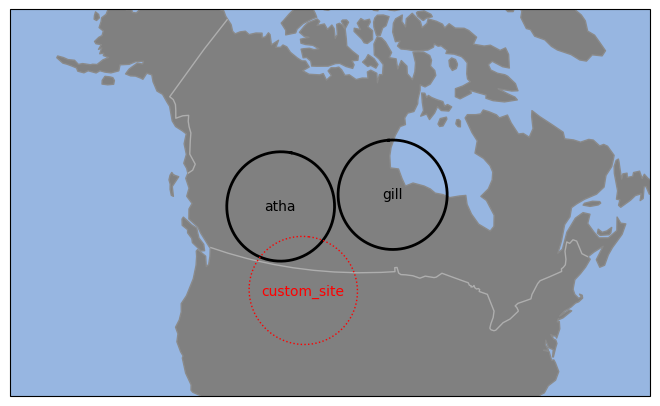

In [4]:
# Maybe you would like to distinguish your site using a different color...

# To do so, simply create two FOVData objects, one for the true THEMIS sites
# and one for your custom site, and combine them in a list
themis_fov_data = at.fov.create_data(sites=['atha', 'gill'], instrument_array='themis_asi', linewidth=2)
custom_fov_data = at.fov.create_data(sites=('custom_site',46.9,-108.3), color='red', linestyle=':', instrument_array='themis_asi')
fov_data = [themis_fov_data, custom_fov_data]

# create projection
center_lat = -100.0
center_lon = 55.0
projection_obj = cartopy.crs.NearsidePerspective(central_longitude=center_lat, central_latitude=center_lon)

# Create the map object
fov_map = at.fov.create_map(projection_obj, fov_data)

# Plot the map with FoVs
map_extent = [-145, -65, 30, 70]
fov_map.plot(map_extent)

## Plotting an entire instrument array

Maybe you'd like to see the complete coverage of an instrument array like THEMIS-ASI or REGO... this is also straightforward

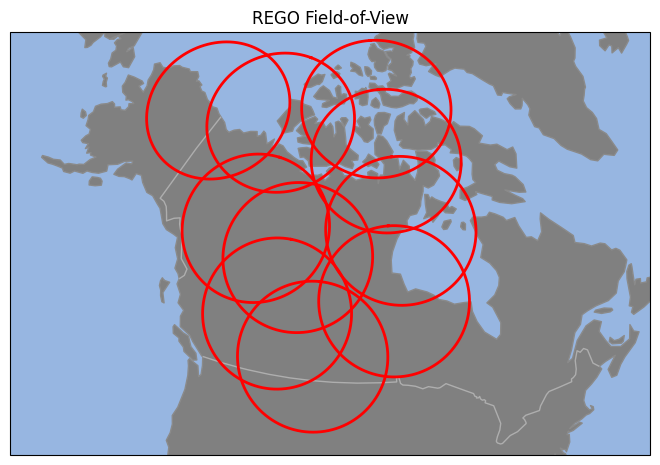

In [5]:
# To plot all sites for an array, just specify the instrument without any sites
fov_data = at.fov.create_data(instrument_array='rego', color='red', linewidth=2)

# create projection
center_lat = -100.0
center_lon = 55.0
projection_obj = cartopy.crs.NearsidePerspective(central_longitude=center_lat, central_latitude=center_lon)

# Create the map object
fov_map = at.fov.create_map(projection_obj, fov_data)

# Plot the map with FoVs
map_extent = [-145, -65, 35, 80]
fov_map.plot(map_extent, label=False, title='REGO Field-of-View')

You can also overplot other contours, lines of constant lat/lon, etc. just as you would for a mosaic!

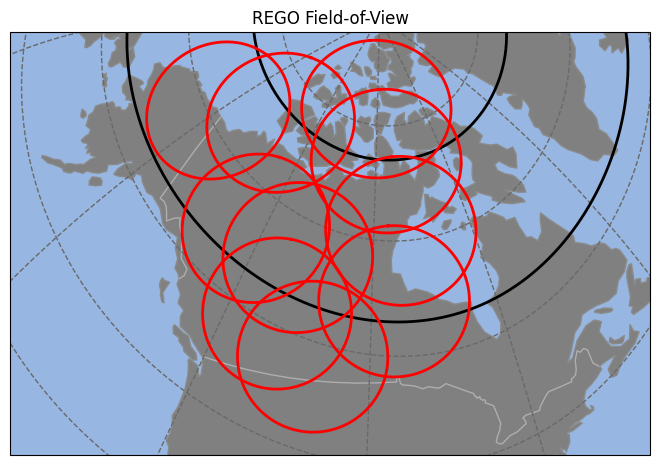

In [6]:
# add geographic gridlines using many lines of constant lat and lon. These will go behind the image data
lat_locs = np.arange(0, 90, 10)
lon_locs = np.arange(-180, 40, 30)

# Add Geomagnetic gridlines
fov_map.add_mag_contours(timestamp=datetime.datetime.today(), constant_lats=lat_locs, constant_lons=lon_locs, linestyle="--", color="dimgray")

# Overplot two specifi lines of geomagnetic lat
fov_map.add_mag_contours(timestamp=datetime.datetime.today(), constant_lats=[63,77], color="black", linewidth=2)

fov_map.plot(map_extent, label=False, title='REGO Field-of-View')

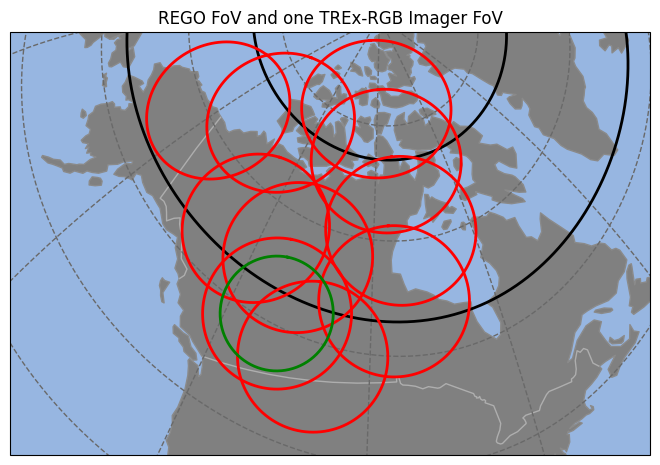

In [7]:
# You can also quickly add more FOVs to a plot after creation
fov_data = at.fov.create_data(sites='atha', instrument_array='trex_rgb', color='green', linewidth=2)

fov_map.add_fov(fov_data)

fov_map.plot(map_extent, label=False, title='REGO FoV and one TREx-RGB Imager FoV')

## Plotting Spectrograph FoVs

The FoV plotting tools also have compatibility with the TREx-Spectrographs

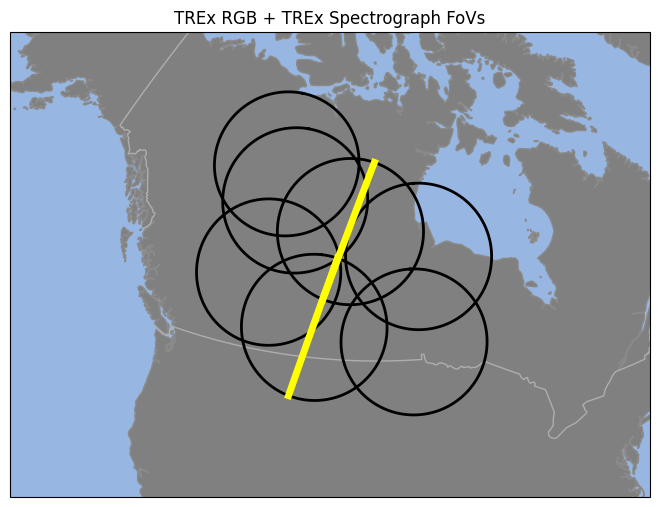

In [8]:
# All TREx-RGB ASI FoVs
rgb_fov_data = at.fov.create_data(instrument_array='trex_rgb', color='black', linewidth=2)
spect_fov_data = at.fov.create_data(instrument_array='trex_spectrograph', color='yellow', linewidth=5)
fov_data = [rgb_fov_data, spect_fov_data]

# create projection
center_lat = -100.0
center_lon = 55.0
projection_obj = cartopy.crs.NearsidePerspective(central_longitude=center_lat, central_latitude=center_lon)

# Create the map object
fov_map = at.fov.create_map(projection_obj, fov_data)

# Plot the map with FoVs
map_extent = [-135, -75, 35, 70]
fov_map.plot(map_extent, label=False, title='TREx RGB + TREx Spectrograph FoVs')

## Plotting FoVs based on data availability

Maybe you'd like to plot the FoVs of a particular array of ASIs, only for instruments that actually took data for a given time range... This can be achieved using the FOVData object's built-in `add_availability` method:

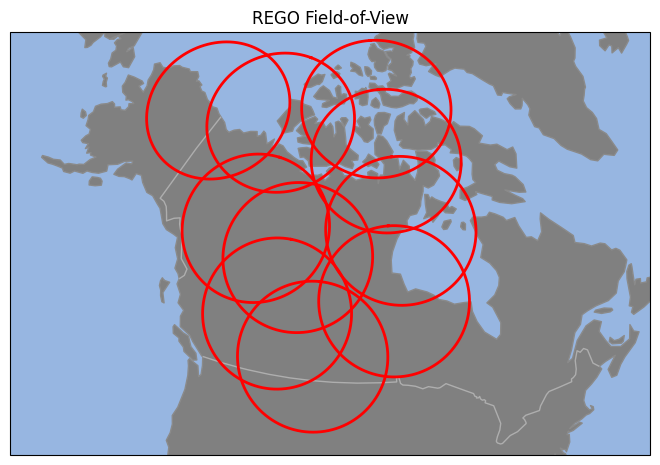

In [9]:
fov_data = at.fov.create_data(instrument_array='rego', color='red', linewidth=2)

# create projection
center_lat = -100.0
center_lon = 55.0
projection_obj = cartopy.crs.NearsidePerspective(central_longitude=center_lat, central_latitude=center_lon)

# Create the map object
fov_map = at.fov.create_map(projection_obj, fov_data)

# Plot the map with FoVs
map_extent = [-145, -65, 35, 80]
fov_map.plot(map_extent, label=False, title='REGO Field-of-View')

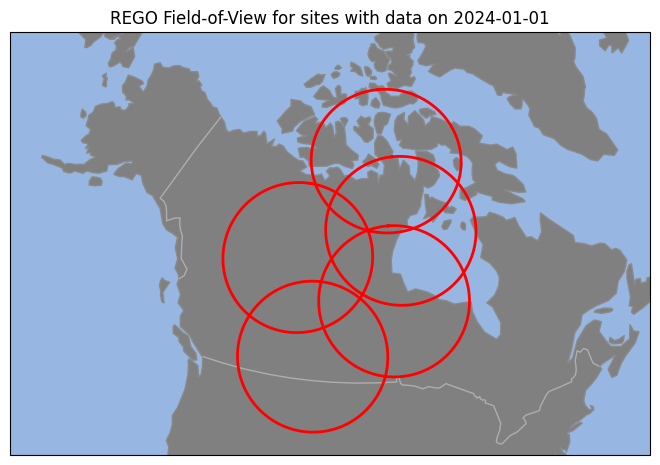

In [10]:
# Add data availability information to the FOVData object

# We will look for sites that have data anytime on 2024-01-01
start = datetime.datetime(2024, 1, 1, 0, 0)
end = datetime.datetime(2024, 1, 1, 23, 59)

# Call the add_availability method to add availability information to the FOVData object
fov_data.add_availability(dataset_name="REGO_RAW", start=start, end=end)

# *** Note: If passing a list of FOVData objects to the create_map() function, you will need to add_availability to each one, in order
# ***       to use that information when plotting.

# Create a new map map object with the data, which now includes information
# about which sites are available on our date of interest
fov_map = at.fov.create_map(projection_obj, fov_data)

# Plot the map with FoVs
map_extent = [-145, -65, 35, 80]
fov_map.plot(map_extent, label=False, title=f"REGO Field-of-View for sites with data on {start.date()}", enforce_data_availability=True)